In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [5]:
%pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/thsdndud0001/code/Users/thsdndud000'

In [5]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/thsdndud0001/code/Users/thsdndud000/train_df.csv')

In [6]:
X = train_df[['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']]
Y = train_df['ICE_state']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [8]:
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [9]:
params = {
    'n_estimators':[50,100,150,200],
    'max_depth':[3,4,5]
}

In [10]:
xgb = xgb.XGBClassifier(learning_rate=0.1, random_state=42)

In [11]:
grid_cv = GridSearchCV(xgb,param_grid=params,cv=2,n_jobs=2,verbose=2)
grid_cv.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[12:21:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:18:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=3, n_estimators=50; total time= 4.5min
[09:23:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=100; total time= 8.8min
[09:31:48] WARNING

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=2,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [12]:
grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [13]:
estimator = grid_cv.best_estimator_
pred = estimator.predict(x_test_scaled)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluation(y_test , pred):
    
    mae = mean_absolute_error(y_test,pred) ## mae
    mse = mean_squared_error(y_test,pred) # mse
    rmse = np.sqrt(mean_squared_error(y_test,pred)) # rmse

    print('mae: {}, mse: {}, rmse:{}'.format(mae, mse, rmse))

In [15]:
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
evaluation(y_test, pred)

최적 하이퍼 파라미터:
 {'max_depth': 5, 'n_estimators': 200}
최고 예측 정확도: 0.8804
mae: 0.11886985966484208, mse: 0.124953854573874, rmse:0.3534881250818392


In [16]:
# 중요 특징 시각화
feature_importances = estimator.feature_importances_
features = ['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

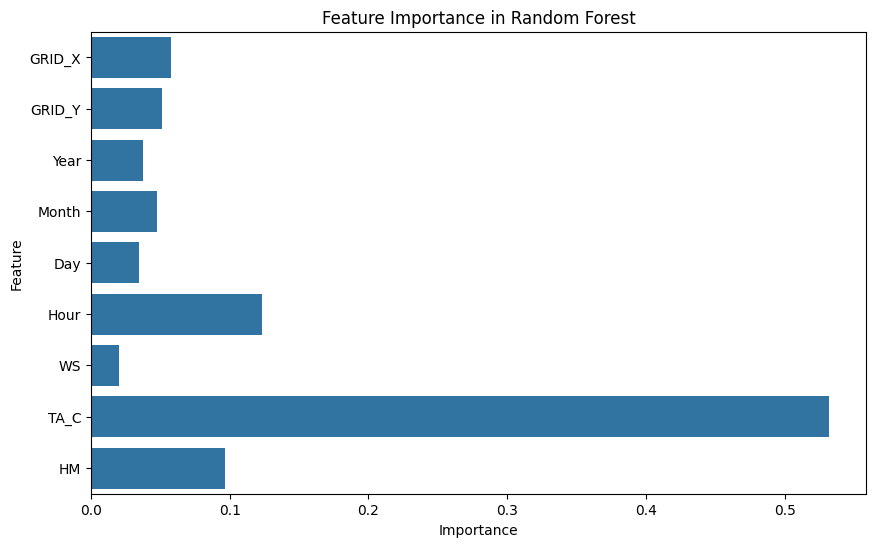

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [18]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/thsdndud0001/code/Users/thsdndud000/XGB_model','wb') as f:
    pickle.dump(estimator,f)

In [9]:
# DMatrix로 변환 (XGBoost의 데이터 구조)
dtrain = xgb.DMatrix(x_train_scaled, label=y_train)
dval = xgb.DMatrix(x_test_scaled, label=y_test)

In [17]:
# 파라미터 설정
params = {
    'learning_rate':0.1,
    'objective':'multi:softprob',
    'eval_metric':'mlogloss',
    'max_depth':5,
    'n_jobs':4,
    'num_class':3,
    'random_state':42,
    'eta':0.1,
    'silent':1
}

In [18]:
# evals 설정
evals = [(dtrain,'train'),(dval,'eval')]

In [19]:
# 모델 학습
num_round = 200 # n_estimators와 같은 의미
xgb_model = xgb.train(params, dtrain, num_round, evals=evals, early_stopping_rounds=10, verbose_eval=True)

[15:23:21] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.01131	eval-mlogloss:1.00987
[1]	train-mlogloss:0.93508	eval-mlogloss:0.93488
[2]	train-mlogloss:0.87264	eval-mlogloss:0.87174
[3]	train-mlogloss:0.81727	eval-mlogloss:0.81714
[4]	train-mlogloss:0.76835	eval-mlogloss:0.77008
[5]	train-mlogloss:0.72762	eval-mlogloss:0.72924
[6]	train-mlogloss:0.69369	eval-mlogloss:0.69252
[7]	train-mlogloss:0.66326	eval-mlogloss:0.66123
[8]	train-mlogloss:0.63358	eval-mlogloss:0.63319
[9]	train-mlogloss:0.60765	eval-mlogloss:0.60883
[10]	train-mlogloss:0.58754	eval-mlogloss:0.58688
[11]	train-mlogloss:0.56623	eval-mlogloss:0.56721
[12]	train-mlogloss:0.55029	eval-mlogloss:0.54939
[13

In [20]:
# 정확도와 손실 추적
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

In [21]:
from sklearn.metrics import log_loss

# 각 iteration의 정확도와 손실을 추적
for i in range(num_round):
    # 훈련 데이터와 검증 데이터에 대해 예측
    y_train_pred = xgb_model.predict(dtrain, ntree_limit=i+1)
    y_val_pred = xgb_model.predict(dval, ntree_limit=i+1)

    # 클래스 확률을 예측된 클래스 라벨로 변환 (argmax 사용)
    y_train_pred_class = np.argmax(y_train_pred, axis=1) # 가장 큰 확률 값의 인덱스 선택
    y_val_pred_class = np.argmax(y_val_pred, axis=1) # 가장 큰 확률 값의 인덱스 선택
    
    # 정확도 계산
    train_acc = accuracy_score(y_train, y_train_pred_class)
    val_acc = accuracy_score(y_test, y_val_pred_class)

    # 손실 계산
    train_loss = log_loss(y_train, y_train_pred)
    val_loss = log_loss(y_test, y_val_pred)

    # 기록
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/xgboost/core.py:105: UserWar

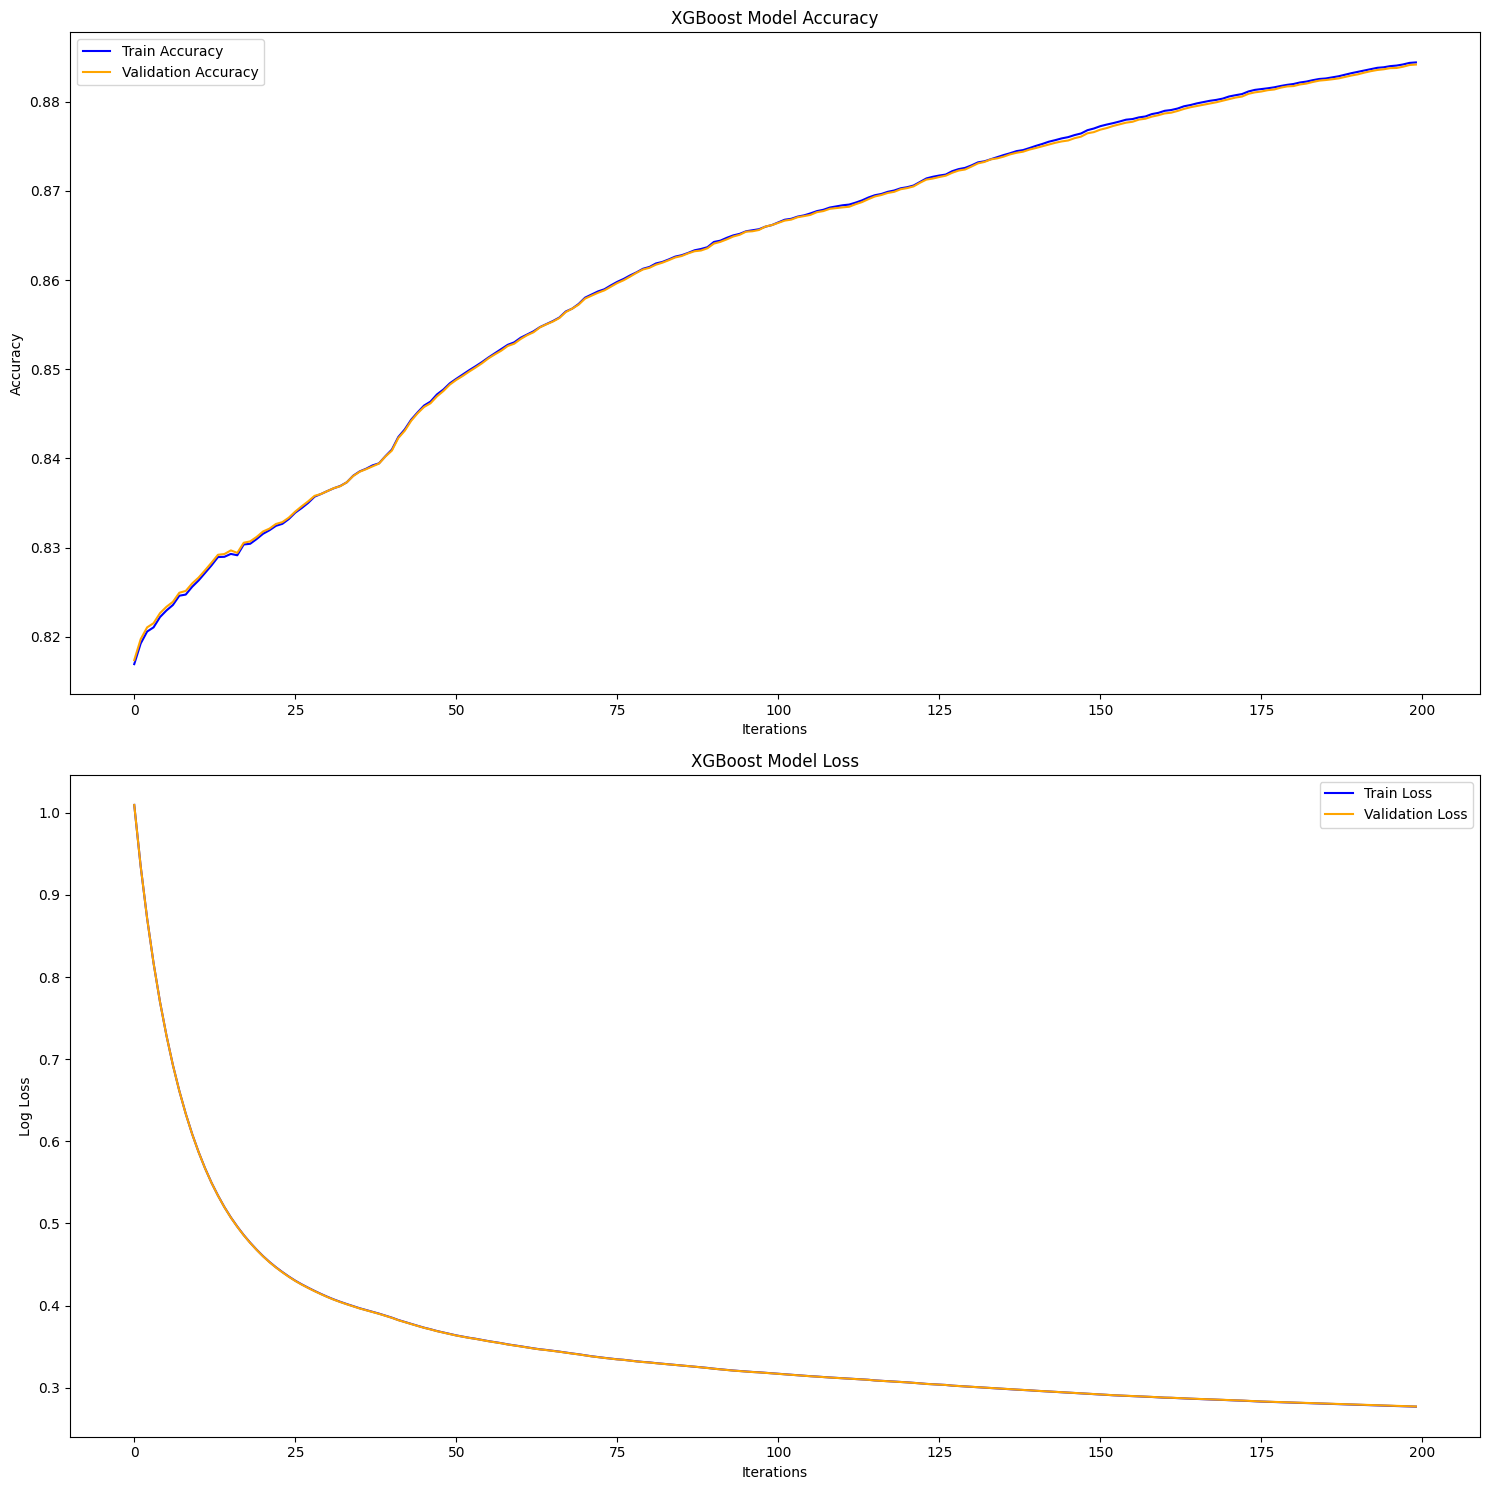

In [24]:
# 그래프 그리기
plt.figure(figsize=(15,15))

# Accuracy 그래프
plt.subplot(2,1,1)
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('XGBoost Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(2,1,2)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('XGBoost Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/thsdndud0001/code/Users/thsdndud000/XGB_accuracy,loss.png')